# Анализируем нормализованные CPM. Строим картинку MDS и PCA

In [144]:
print('Package Versions:')
import pandas as pd; print("  pandas:", pd.__version__)
import numpy as np; print("  numpy:", np.__version__)

from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt
import seaborn as sns;  print("  seaborn:", sns.__version__)
%matplotlib inline

Package Versions:
  pandas: 1.3.1
  numpy: 1.20.3
  seaborn: 0.11.1


## LOAD TABLE

In [49]:
cpm = pd.read_csv(r'cpm_values.csv')
cpm.rename(columns={"Unnamed: 0":"genes_id"}, inplace=True)

In [50]:
cpm.head()

,genes_id,rnaseq1_s,rnaseq2_s,rnaseq3_s,rnaseq4_s,rnaseq5_s,rnaseq6_s,rnaseq7_s,rnaseq8_s,rnaseq9_s,rnaseq10_s,rnaseq11_s,rnaseq12_s,rnaseq13_s,rnaseq14_s,rnaseq15_s,rnaseq16_s
0,Soltu.DM.01G000010.v6.1,25.442630,24.077096,21.977342,21.097029,28.423659,26.692875,31.177969,30.152846,24.271813,23.020920,22.966668,25.417626,29.090779,26.967729,29.321961,25.666399
1,Soltu.DM.01G000030.v6.1,12.968674,14.210641,10.136488,10.669598,8.534928,9.734188,11.173385,15.344199,12.933925,9.102067,15.901090,11.880283,13.853411,16.629096,15.948100,10.717331
2,Soltu.DM.01G000040.v6.1,8.710567,9.976901,7.840080,7.763593,14.203999,14.339349,16.868868,15.070196,11.383059,9.650184,10.902796,9.914279,13.479743,12.460536,12.779805,16.359646
3,Soltu.DM.01G000050.v6.1,12.438619,13.732044,12.899354,12.236562,13.248714,11.354523,11.416563,13.077443,15.343038,12.307721,13.550617,13.410958,13.465903,13.348424,13.023520,10.962649
4,Soltu.DM.01G000060.v6.1,16.378693,17.800116,15.949271,14.444556,19.653825,19.322181,16.267323,19.030793,15.282810,16.111322,14.386026,15.152276,19.458438,17.817964,16.009029,17.126265


In [51]:
cpm.tail()

,genes_id,rnaseq1_s,rnaseq2_s,rnaseq3_s,rnaseq4_s,rnaseq5_s,rnaseq6_s,rnaseq7_s,rnaseq8_s,rnaseq9_s,rnaseq10_s,rnaseq11_s,rnaseq12_s,rnaseq13_s,rnaseq14_s,rnaseq15_s,rnaseq16_s
24512,Soltu.DM.S001100.v6.1,5.441896,4.178517,9.723852,4.316273,3.648877,4.775722,3.340497,8.867752,15.433380,11.261316,13.763010,15.376962,8.276064,13.032396,10.814853,7.788847
24513,Soltu.DM.S001780.v6.1,0.812751,0.184076,0.233229,0.527070,0.501133,0.292391,0.166385,0.348732,0.466766,0.514898,1.118599,1.348117,0.152235,0.255832,0.091393,0.199321
24514,Soltu.DM.S001790.v6.1,0.530055,0.533819,0.699687,0.512824,0.156604,0.304574,0.038397,0.423460,0.225854,0.398631,0.453103,0.561715,0.110717,0.105343,0.121857,0.505968
24515,Soltu.DM.S001810.v6.1,0.671403,0.441782,0.681746,0.527070,0.642077,0.889356,0.601545,0.759737,0.632392,0.448459,0.523901,0.463415,0.913412,0.541762,0.563591,0.505968
24516,Soltu.DM.S002100.v6.1,0.141348,0.220891,1.148204,0.042735,1.174531,0.146196,0.076793,0.236639,0.000000,0.000000,0.028319,0.056172,0.083037,1.866071,0.060929,0.091994


In [52]:
print(f"Количество генов: {cpm['genes_id'].nunique()}")

Количество генов: 24517


## MDS analysis

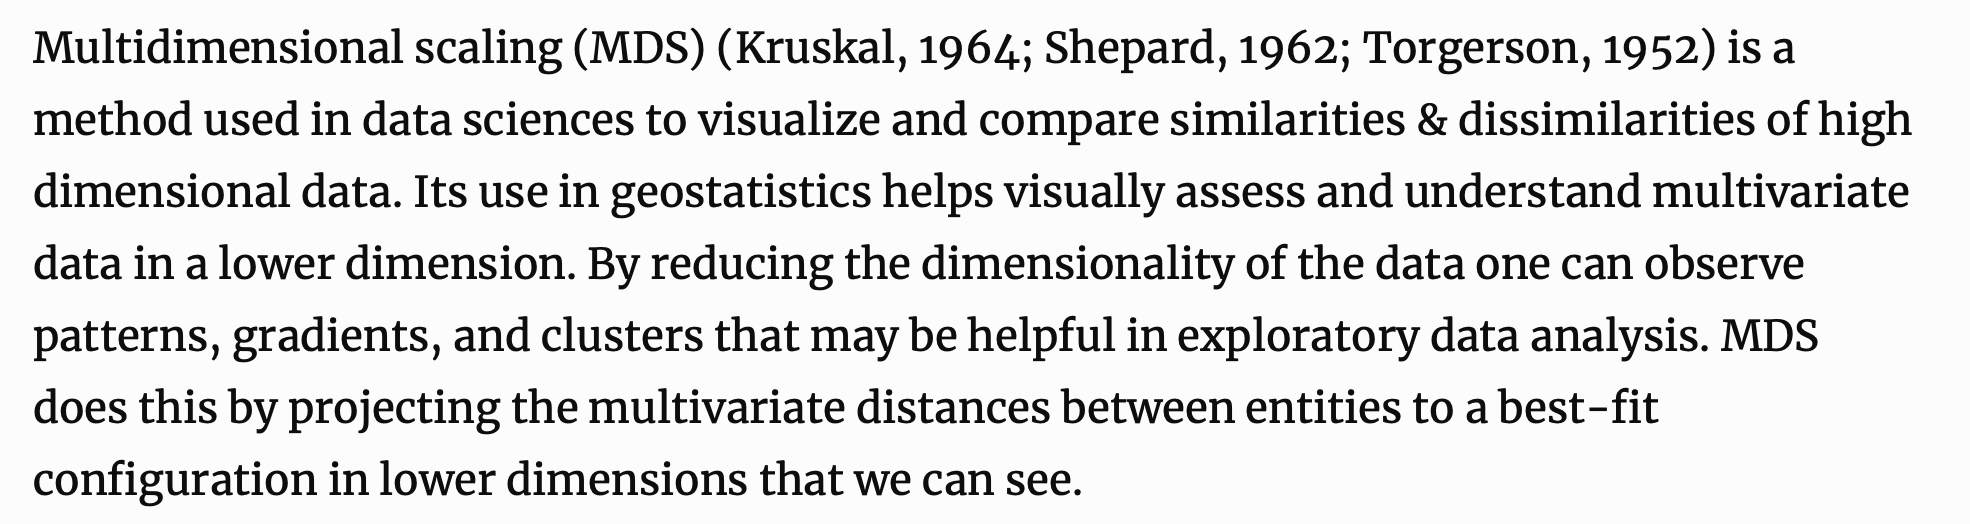

https://geostatisticslessons.com/lessons/mds

### Scaling of CPMs

Используем шкалирование и последующий анализ библиотекой mds

In [53]:
X = cpm.drop('genes_id', axis=1)

In [54]:
# нормализуем данные
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [145]:
# стандартизируем значения
scaler2 = StandardScaler()
X_scaled2 = scaler2.fit_transform(X)

Используем встроенный пакет для MDS

In [55]:
mds = MDS(2, random_state=123) #dissimilarity{‘euclidean’, ‘precomputed’}, default=’euclidean’

In [151]:
# MDS with normilized data
X_2d = mds.fit_transform(X_scaled.T)

In [152]:
# MDS with standartized data
X_2d2 = mds.fit_transform(X_scaled2.T)

### visualisation

In [153]:
X_2d

array([[ 0.19840483,  0.02112172],
       [ 0.28891888,  0.15394201],
       [ 0.42095881, -0.15252065],
       [ 0.31390992,  0.08577674],
       [ 0.27357474, -0.3538291 ],
       [ 0.15460502, -0.3304614 ],
       [ 0.21881594, -0.15937185],
       [-0.00462557, -0.41676282],
       [-0.11638144,  0.30242866],
       [-0.10218579,  0.73761923],
       [-0.25097976,  0.27817522],
       [-0.39313886,  0.33610979],
       [-0.15656847, -0.09636225],
       [-0.27983604, -0.08738297],
       [-0.14703201,  0.10951866],
       [-0.4184402 , -0.42800098]])

In [158]:
X_2d2

array([[  0.11883688, -12.09328606],
       [ -0.97001017, -20.46954902],
       [ -6.77820991, -18.16408067],
       [  2.30682553, -20.45705054],
       [ 15.2968776 , -16.33928039],
       [ 13.0661018 ,  -8.2890681 ],
       [ 19.49906392, -11.62410148],
       [ 19.13212784,   1.62792019],
       [-16.16864653,   4.77563257],
       [-30.75984982,   3.60907884],
       [-12.99784822,  14.80217756],
       [-20.23979065,  21.20260679],
       [  5.59118517,   9.41713201],
       [  3.77080847,  16.81557602],
       [ -0.66170953,  10.19486909],
       [  9.79423763,  24.9914232 ]])

In [154]:
MDS_df = pd.DataFrame(data = X_2d, columns = ['Dimension 1', 'Dimension 2']) # MinMAx data

In [159]:
MDS_df2 = pd.DataFrame(data = X_2d2, columns = ['Dimension 1', 'Dimension 2']) # Scaled data

In [155]:
samples_lst = pd.Series(['mock22','mock22','mock22','mock22',
               'mock28','mock28','mock28','mock28',
              'PVY22','PVY22','PVY22','PVY22',
              'PVY28','PVY28','PVY28','PVY28'])

In [156]:
# MinMax data
concat_X2d = pd.concat([MDS_df, samples_lst], axis = 1)
concat_X2d.columns = ['Dimension 1', 'Dimension 2', 'samples']
concat_X2d

,Dimension 1,Dimension 2,samples
0,0.198405,0.021122,mock22
1,0.288919,0.153942,mock22
2,0.420959,-0.152521,mock22
3,0.313910,0.085777,mock22
4,0.273575,-0.353829,mock28
5,0.154605,-0.330461,mock28
6,0.218816,-0.159372,mock28
7,-0.004626,-0.416763,mock28
8,-0.116381,0.302429,PVY22
9,-0.102186,0.737619,PVY22


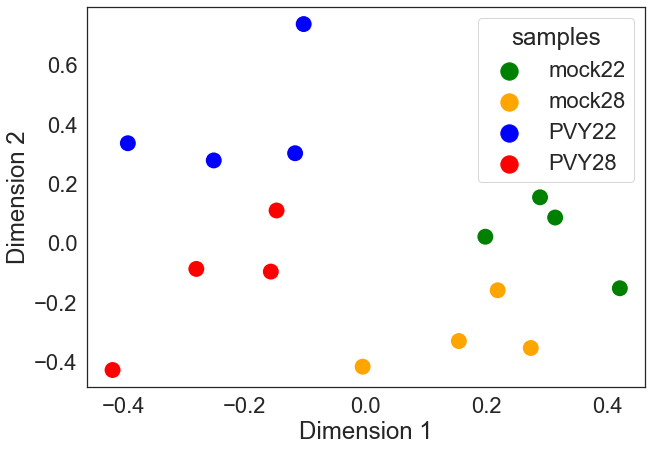

In [157]:
plt.figure(figsize=(10,7))
sns.set(style='white', font_scale=2, font='Arial')
sns.scatterplot(data=concat_X2d, x='Dimension 1',y='Dimension 2', hue='samples', palette=['green','orange','blue','red'], sizes=(300,300), size='samples')
plt.savefig('./images/MDS_CPMs.jpeg', dpi=300, bbox_inches='tight');

In [160]:
# Standardize data
concat_X2d2 = pd.concat([MDS_df2, samples_lst], axis = 1)
concat_X2d2.columns = ['Dimension 1', 'Dimension 2', 'samples']
concat_X2d2

,Dimension 1,Dimension 2,samples
0,0.118837,-12.093286,mock22
1,-0.970010,-20.469549,mock22
2,-6.778210,-18.164081,mock22
3,2.306826,-20.457051,mock22
4,15.296878,-16.339280,mock28
5,13.066102,-8.289068,mock28
6,19.499064,-11.624101,mock28
7,19.132128,1.627920,mock28
8,-16.168647,4.775633,PVY22
9,-30.759850,3.609079,PVY22


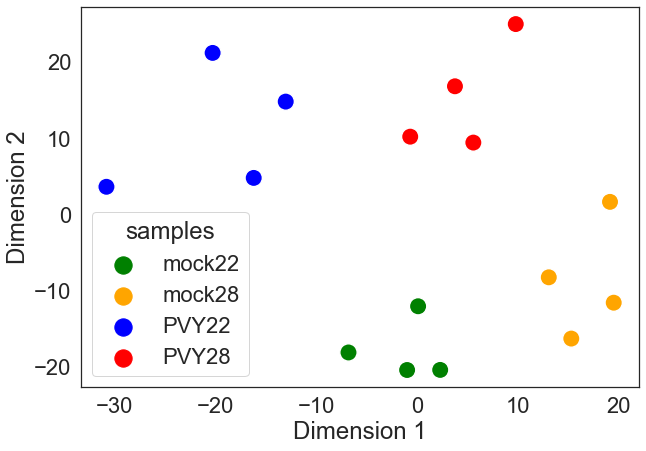

In [161]:
plt.figure(figsize=(10,7))
sns.set(style='white', font_scale=2, font='Arial')
sns.scatterplot(data=concat_X2d2, x='Dimension 1',y='Dimension 2', hue='samples', palette=['green','orange','blue','red'], sizes=(300,300), size='samples')
plt.savefig('./images/MDS_CPMs2.jpeg', dpi=300, bbox_inches='tight');

### Spearman correlation for MDS

Попробуем использовать данные по корреляции

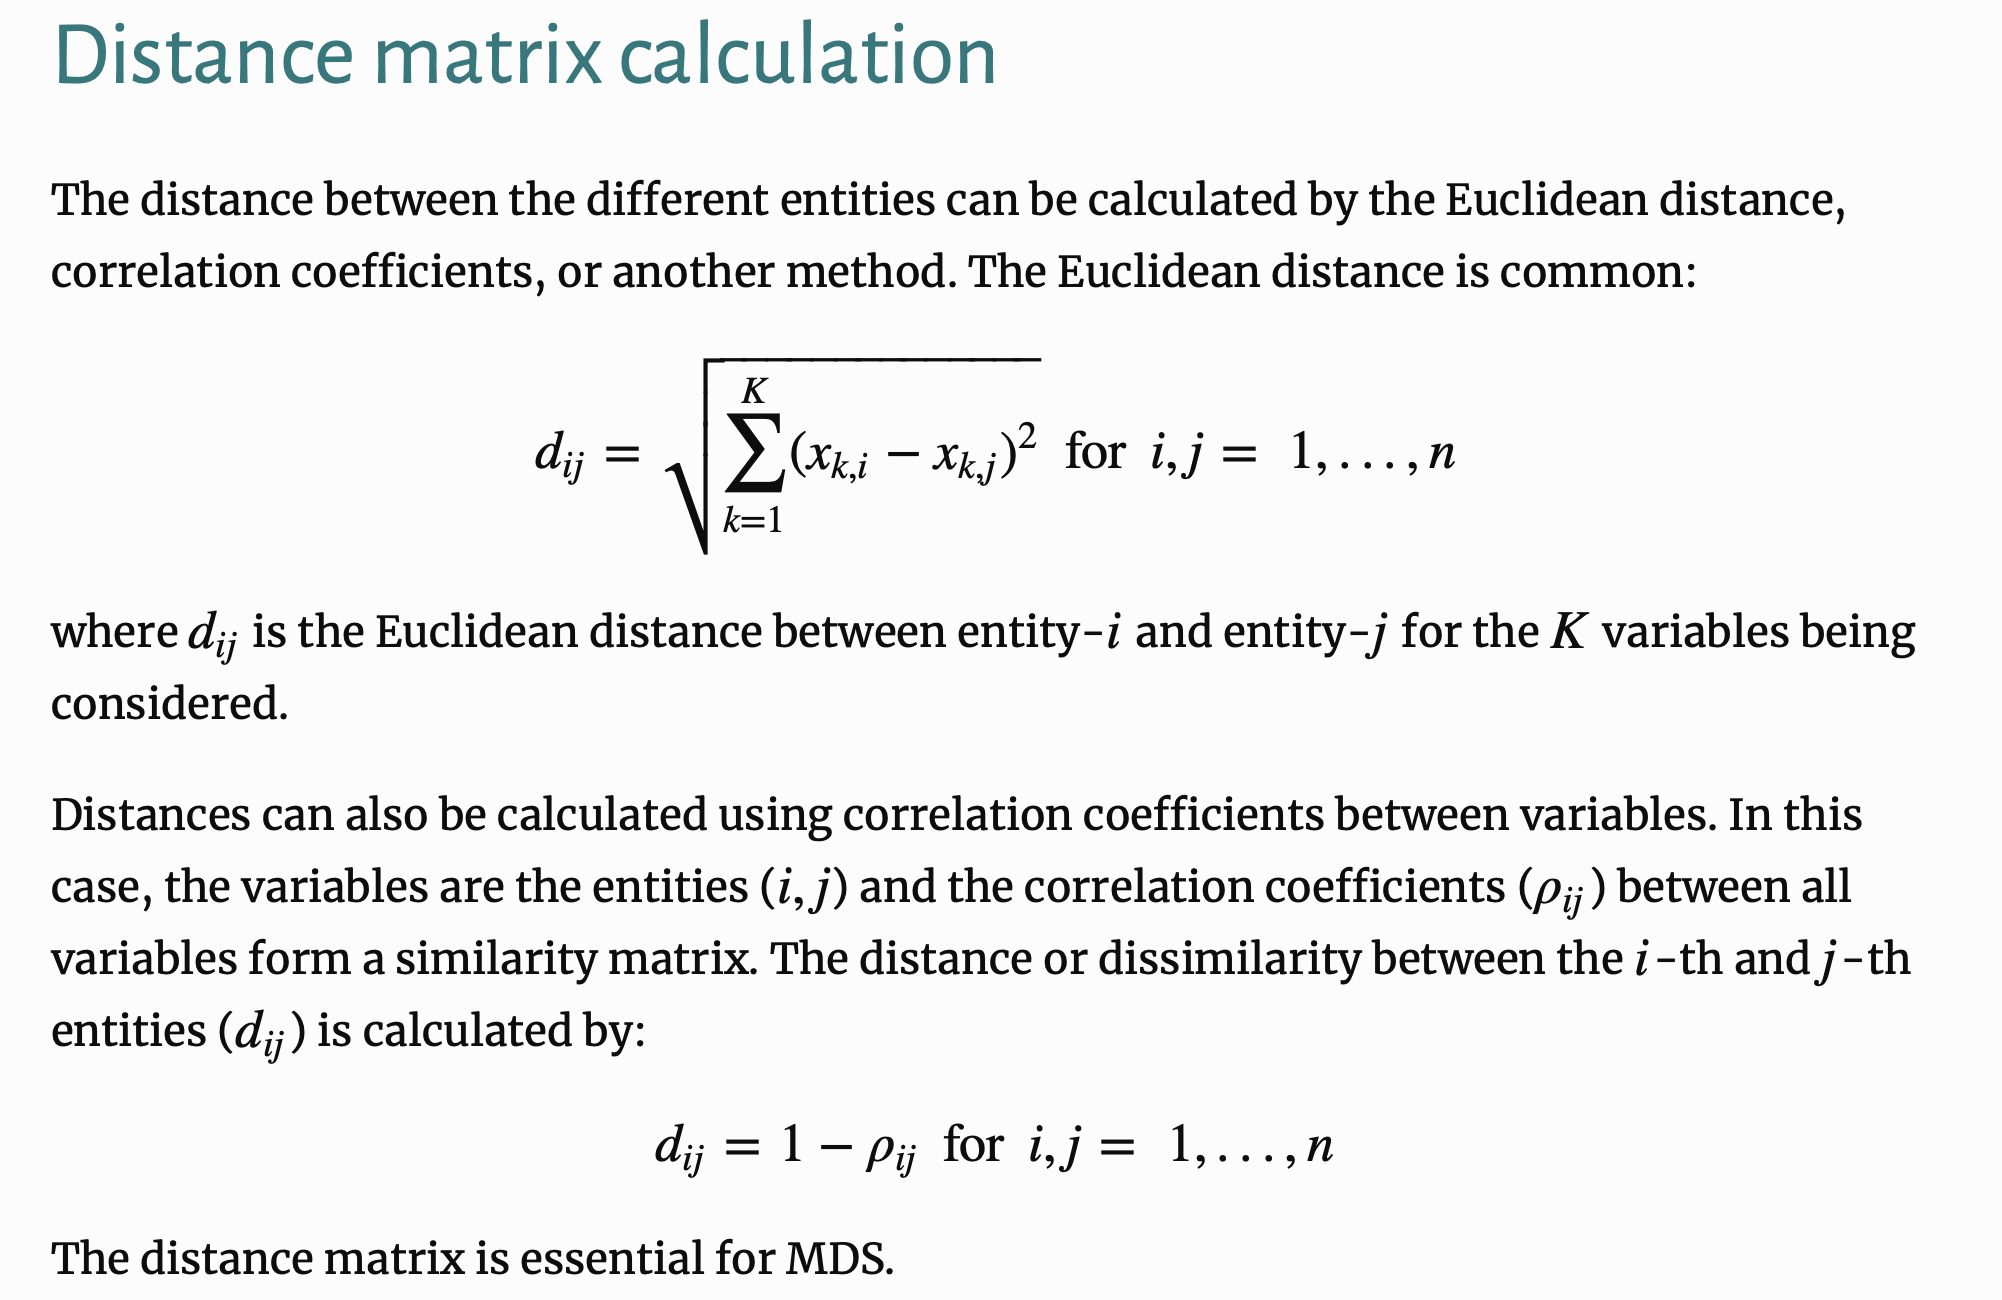

In [164]:
sperm_corr = 1-cpm.corr(method='spearman')

In [165]:
sperm_corr

,rnaseq1_s,rnaseq2_s,rnaseq3_s,rnaseq4_s,rnaseq5_s,rnaseq6_s,rnaseq7_s,rnaseq8_s,rnaseq9_s,rnaseq10_s,rnaseq11_s,rnaseq12_s,rnaseq13_s,rnaseq14_s,rnaseq15_s,rnaseq16_s
rnaseq1_s,0.000000,0.006132,0.011556,0.007265,0.032001,0.031345,0.028891,0.022626,0.038269,0.041531,0.041992,0.040489,0.043864,0.034437,0.032387,0.030467
rnaseq2_s,0.006132,0.000000,0.011617,0.007048,0.031271,0.030406,0.026835,0.022474,0.041753,0.044374,0.045901,0.045382,0.041628,0.032700,0.031002,0.029228
rnaseq3_s,0.011556,0.011617,0.000000,0.008895,0.034013,0.029333,0.037223,0.031284,0.040509,0.039628,0.039152,0.042373,0.048590,0.035201,0.040918,0.034427
rnaseq4_s,0.007265,0.007048,0.008895,0.000000,0.034470,0.034576,0.033635,0.031880,0.036915,0.038825,0.043228,0.039823,0.047058,0.039389,0.037335,0.037335
rnaseq5_s,0.032001,0.031271,0.034013,0.034470,0.000000,0.004897,0.016486,0.020647,0.059302,0.059121,0.059424,0.062575,0.025305,0.025948,0.032097,0.041073
rnaseq6_s,0.031345,0.030406,0.029333,0.034576,0.004897,0.000000,0.016731,0.017277,0.059128,0.057295,0.056153,0.061767,0.025584,0.022374,0.031648,0.034823
rnaseq7_s,0.028891,0.026835,0.037223,0.033635,0.016486,0.016731,0.000000,0.011913,0.050331,0.054784,0.055455,0.061796,0.018066,0.024225,0.018337,0.028853
rnaseq8_s,0.022626,0.022474,0.031284,0.031880,0.020647,0.017277,0.011913,0.000000,0.048524,0.052774,0.048399,0.053149,0.025725,0.017632,0.018984,0.018407
rnaseq9_s,0.038269,0.041753,0.040509,0.036915,0.059302,0.059128,0.050331,0.048524,0.000000,0.005886,0.008293,0.007657,0.035787,0.034554,0.028969,0.034648
rnaseq10_s,0.041531,0.044374,0.039628,0.038825,0.059121,0.057295,0.054784,0.052774,0.005886,0.000000,0.008358,0.007950,0.038449,0.034797,0.032159,0.034762


In [172]:
mds_precomp = MDS(n_components=2, dissimilarity='precomputed', random_state=123)

In [173]:
X_2d_corr = mds_precomp.fit_transform(sperm_corr)

In [174]:
X_2d_corr

array([[-0.00491963, -0.01760952],
       [-0.00189827, -0.01888495],
       [-0.00995478, -0.01587069],
       [-0.01008774, -0.02035207],
       [ 0.02450664, -0.01797323],
       [ 0.02329015, -0.0153475 ],
       [ 0.02428963, -0.0045989 ],
       [ 0.01677244, -0.00466711],
       [-0.02506601,  0.01386492],
       [-0.02633387,  0.01634711],
       [-0.022517  ,  0.02041954],
       [-0.03203312,  0.01268893],
       [ 0.01971832,  0.01434661],
       [ 0.01091604,  0.01015219],
       [ 0.0080083 ,  0.01177267],
       [ 0.00530891,  0.01571199]])

In [168]:
MDS_df_corr = pd.DataFrame(data = X_2d_corr, columns = ['Dimension 1', 'Dimension 2'])

In [169]:
concat_X2d_corr = pd.concat([MDS_df_corr, samples_lst], axis = 1)
concat_X2d_corr.columns = ['Dimension 1', 'Dimension 2', 'samples']
concat_X2d_corr

,Dimension 1,Dimension 2,samples
0,-0.005376,-0.046828,mock22
1,0.001734,-0.048397,mock22
2,-0.016663,-0.042367,mock22
3,-0.018779,-0.050458,mock22
4,0.062420,-0.040172,mock28
5,0.059851,-0.035324,mock28
6,0.061802,-0.011655,mock28
7,0.049037,-0.006254,mock28
8,-0.067644,0.043371,PVY22
9,-0.074705,0.039808,PVY22


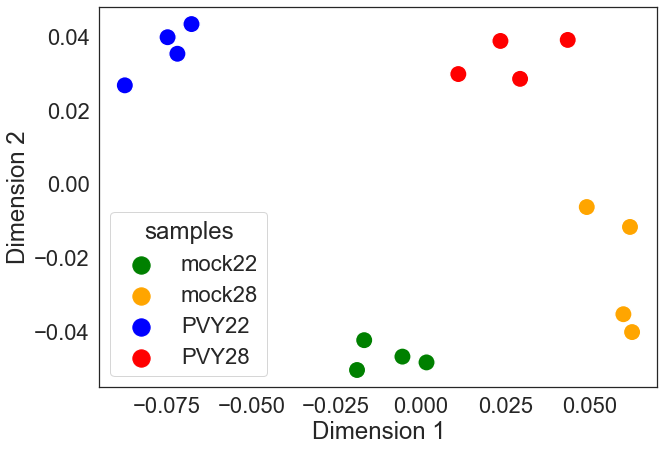

In [171]:
plt.figure(figsize=(10,7))
sns.set(style='white', font_scale=2, font='Arial')
sns.scatterplot(data=concat_X2d_corr, x='Dimension 1',y='Dimension 2', hue='samples', palette=['green','orange','blue','red'],sizes=(300,300), size='samples')
plt.savefig('./images/MDS_CPMs_spearmen.jpeg', dpi=300, bbox_inches='tight');

## PCA analysis

In [175]:
pca = PCA(n_components=2)

In [177]:
principalComponents = pca.fit_transform(X_scaled2.T)

In [178]:
principalComponents

array([[-10.77755427,   5.64596724],
       [-14.37418899,  10.83255789],
       [-13.35134986,   5.47726178],
       [-13.84161149,  11.90575595],
       [-18.92209214,  -3.45744257],
       [-14.48774344,  -5.55139567],
       [-15.52930802,  -0.53500652],
       [ -8.48380005, -10.88489662],
       [ 13.40137506,   7.46174459],
       [ 21.38197782,  17.98460491],
       [ 17.76858138,   0.13035122],
       [ 24.94270978,   3.04177807],
       [  4.99248249, -10.12995536],
       [  8.92657844,  -9.58567186],
       [  6.93915865,  -8.12109181],
       [ 11.41478463, -14.21456126]])

In [179]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [182]:
finalDf = pd.concat([principalDf, samples_lst], axis = 1)
finalDf.columns = ['principal component 1', 'principal component 2', 'samples']
finalDf

,principal component 1,principal component 2,samples
0,-10.777554,5.645967,mock22
1,-14.374189,10.832558,mock22
2,-13.351350,5.477262,mock22
3,-13.841611,11.905756,mock22
4,-18.922092,-3.457443,mock28
5,-14.487743,-5.551396,mock28
6,-15.529308,-0.535007,mock28
7,-8.483800,-10.884897,mock28
8,13.401375,7.461745,PVY22
9,21.381978,17.984605,PVY22


In [186]:
pca_var = pca.explained_variance_ratio_
pca_var

array([0.49632747, 0.19286783])

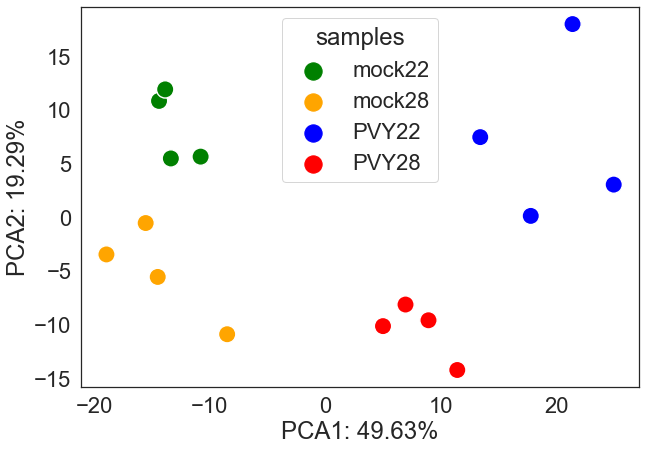

In [190]:
plt.figure(figsize=(10,7))
sns.set(style='white', font_scale=2, font='Arial')
sns.scatterplot(data=finalDf, x='principal component 1',y='principal component 2', hue='samples', palette=['green','orange','blue','red'],sizes=(300,300), size='samples')
plt.xlabel("PCA1: {:.2%}".format(pca_var[0]))
plt.ylabel("PCA2: {:.2%}".format(pca_var[1]))
plt.savefig('./images/PCA_CPMs.jpeg', dpi=300, bbox_inches='tight');